In [31]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [23]:
df = pd.read_excel('bmi_data.xlsx')
df.head()

,Gender,Height,Weight,BMI,Number
0,Male,198,50,12.753801,1
1,Female,198,50,12.753801,2
2,Female,196,50,13.015410,3
3,Female,190,50,13.850416,4
4,Male,190,50,13.850416,5


In [82]:
#Create bins
height_number_of_bins = 10
weight_number_of_bins = 10

height_range_step = (df['Height'].max() - df['Height'].min() + 1)/height_number_of_bins
weight_range_step = (df['Weight'].max() - df['Weight'].min() + 1)/weight_number_of_bins

#Create grid of bins
grid_dim  = (height_number_of_bins, weight_number_of_bins)
bins_grid = np.zeros(grid_dim)
bins_grid_even = np.zeros(grid_dim)
bins_grid_odd  = np.zeros(grid_dim)

height_column = df['Height']
weight_column = df['Weight']
number_column = df['Number']

for i in range(df.shape[0]):
    grid_bin_height_idx = int(( height_column[i] - df['Height'].min() ) // height_range_step)
    grid_bin_weight_idx = int(( weight_column[i] - df['Weight'].min() ) // weight_range_step)
    bins_grid[grid_bin_height_idx][grid_bin_weight_idx] += 1

    #Even count
    if number_column[i] % 2 == 0:
        bins_grid_even[grid_bin_height_idx][grid_bin_weight_idx] += 1
    #Odd count
    else:
        bins_grid_odd[grid_bin_height_idx][grid_bin_weight_idx] += 1


bins_grid

array([[ 1.,  3.,  7.,  8.,  1.,  2.,  3.,  6.,  8.,  3.],
       [ 7.,  8.,  2.,  6.,  5.,  4.,  3.,  1.,  4.,  5.],
       [ 9.,  3.,  5.,  3.,  7.,  9.,  2.,  4.,  6.,  2.],
       [ 4.,  4.,  3.,  1.,  6.,  4.,  6.,  5.,  5.,  9.],
       [ 7.,  7.,  5.,  5.,  6.,  4.,  4.,  4., 10.,  8.],
       [ 2.,  3.,  4.,  4.,  6.,  7.,  3.,  4.,  6.,  3.],
       [10.,  3.,  9.,  4.,  4.,  7.,  9.,  2.,  5.,  9.],
       [ 5.,  4.,  8.,  8.,  8.,  3.,  7.,  8., 11.,  7.],
       [ 7.,  5.,  5.,  3.,  9.,  3.,  5.,  4.,  4.,  2.],
       [ 4.,  4.,  1.,  2.,  4.,  7.,  4.,  3.,  3.,  4.]])

In [83]:
bins_grid_even

array([[1., 1., 2., 2., 1., 1., 2., 1., 5., 2.],
       [2., 3., 0., 2., 3., 3., 3., 1., 3., 2.],
       [6., 3., 2., 3., 4., 2., 0., 3., 2., 1.],
       [2., 2., 3., 0., 1., 4., 5., 3., 3., 5.],
       [6., 2., 3., 3., 3., 3., 2., 2., 3., 1.],
       [1., 1., 2., 3., 4., 4., 3., 2., 4., 2.],
       [5., 1., 6., 3., 0., 3., 4., 2., 2., 4.],
       [2., 0., 4., 6., 1., 2., 5., 2., 5., 4.],
       [3., 3., 2., 0., 4., 2., 2., 3., 2., 1.],
       [1., 3., 0., 1., 3., 3., 3., 1., 2., 2.]])

In [84]:
bins_grid_odd

array([[0., 2., 5., 6., 0., 1., 1., 5., 3., 1.],
       [5., 5., 2., 4., 2., 1., 0., 0., 1., 3.],
       [3., 0., 3., 0., 3., 7., 2., 1., 4., 1.],
       [2., 2., 0., 1., 5., 0., 1., 2., 2., 4.],
       [1., 5., 2., 2., 3., 1., 2., 2., 7., 7.],
       [1., 2., 2., 1., 2., 3., 0., 2., 2., 1.],
       [5., 2., 3., 1., 4., 4., 5., 0., 3., 5.],
       [3., 4., 4., 2., 7., 1., 2., 6., 6., 3.],
       [4., 2., 3., 3., 5., 1., 3., 1., 2., 1.],
       [3., 1., 1., 1., 1., 4., 1., 2., 1., 2.]])

In [90]:
#Prepare numpy dataframe row values for poisson regression
height_bin_values = []
weight_bin_values = []

for i in range(height_number_of_bins):
    height_bin_values.append( df['Height'].min() + height_range_step*i )

for i in range(weight_number_of_bins):
    weight_bin_values.append( df['Weight'].min() + weight_range_step*i )

print(height_bin_values)
print(weight_bin_values)

[140.0, 146.0, 152.0, 158.0, 164.0, 170.0, 176.0, 182.0, 188.0, 194.0]
[50.0, 61.1, 72.2, 83.3, 94.4, 105.5, 116.6, 127.7, 138.8, 149.89999999999998]


In [95]:
bmi_df_data      = []
bmi_df_data_even = []
bmi_df_data_odd  = []

for i in range(height_number_of_bins):
    for j in range(weight_number_of_bins):
        bmi_df_data.append([ height_bin_values[i], weight_bin_values[j], bins_grid[i][j] ])
        bmi_df_data_even.append([ height_bin_values[i], weight_bin_values[j], bins_grid_even[i][j] ])
        bmi_df_data_odd.append([ height_bin_values[i], weight_bin_values[j], bins_grid_odd[i][j] ])

#Create DataFrame for all data
bmi_df      = pd.DataFrame(bmi_df_data, columns = ['Height', 'Weight', 'Count'])
#Create DataFrame for data in even positions
bmi_df_even = pd.DataFrame(bmi_df_data_even, columns = ['Height', 'Weight', 'Count'])
#Create DataFrame for data in odd positions
bmi_df_odd  = pd.DataFrame(bmi_df_data_odd, columns = ['Height', 'Weight', 'Count'])

bmi_df

,Height,Weight,Count
0,140.0,50.0,1.0
1,140.0,61.1,3.0
2,140.0,72.2,7.0
3,140.0,83.3,8.0
4,140.0,94.4,1.0
...,...,...,...
95,194.0,105.5,7.0
96,194.0,116.6,4.0
97,194.0,127.7,3.0
98,194.0,138.8,3.0


In [96]:
bmi_df_even

,Height,Weight,Count
0,140.0,50.0,1.0
1,140.0,61.1,1.0
2,140.0,72.2,2.0
3,140.0,83.3,2.0
4,140.0,94.4,1.0
...,...,...,...
95,194.0,105.5,3.0
96,194.0,116.6,3.0
97,194.0,127.7,1.0
98,194.0,138.8,2.0


In [97]:
bmi_df_odd

,Height,Weight,Count
0,140.0,50.0,0.0
1,140.0,61.1,2.0
2,140.0,72.2,5.0
3,140.0,83.3,6.0
4,140.0,94.4,0.0
...,...,...,...
95,194.0,105.5,4.0
96,194.0,116.6,1.0
97,194.0,127.7,2.0
98,194.0,138.8,1.0


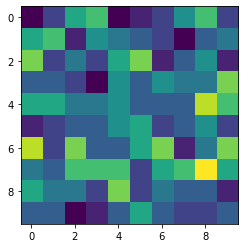

In [98]:
#Plot heatmap of all values
fig, ax    = plt.subplots()
grid_image = ax.imshow(bins_grid)

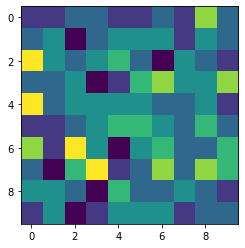

In [88]:
#Plot heatmap of even values
fig, ax         = plt.subplots()
grid_image_even = ax.imshow(bins_grid_even)

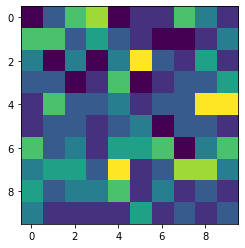

In [89]:
#Plot heatmap of odd values
fig, ax         = plt.subplots()
grid_image_odd  = ax.imshow(bins_grid_odd)